<a href="https://colab.research.google.com/github/Tecindes/Ejercicios-Propuestos/blob/main/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# 1. Análisis exploratorio

## Ejercico  propuesto

In [130]:
datos1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn.csv')
datos1 = datos1.drop('id_cliente', axis=1)
datos1.head(2)
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [131]:
px.histogram(datos1,x='churn',text_auto=True)

In [132]:
px.histogram(datos1,x='pais',text_auto=True,color='churn', barmode='group')

In [133]:
px.histogram(datos1,x='servicios_adquiridos',text_auto=True,color='churn', barmode='group')

In [134]:
px.box(datos1,x='score_credito',color='churn')

In [135]:
px.box(datos1,x='salario_estimado',color='churn')

# 2. Tranformación de los datos

## Ejercicio propuesto

In [136]:
X1 = datos1.drop('churn', axis=1) # variable explicativas
y1 = datos1['churn'] # variable de respuesta

In [137]:
X1.head()

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10


In [138]:
columnas1=X1.columns

In [139]:
one_hot=make_column_transformer((OneHotEncoder(drop='if_binary'),
                                ['pais','sexo_biologico','tiene_tarjeta_credito','miembro_activo']),
                                remainder='passthrough',
                                sparse_threshold=0,
                                force_int_remainder_cols=False)

In [140]:
X1=one_hot.fit_transform(X1)

In [141]:
one_hot.get_feature_names_out(columnas1)

array(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [142]:
pd.DataFrame(X1, columns=one_hot.get_feature_names_out(columnas1))

,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__sexo_biologico_Mujer,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,0.0,1.0,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,0.0,0.0,1.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,0.0,0.0,1.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,0.0,1.0,0.0,1.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,1.0,0.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,0.0,0.0,1.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,1.0,0.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


In [143]:
label_encoder1=LabelEncoder()
y1=label_encoder1.fit_transform(y1)
y1

array([1, 0, 1, ..., 1, 1, 0])

# Ajustando modelos

## Ejercicio propuesto

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify=y1, random_state=5)
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test, y_test)

0.7964

In [145]:
arbol=DecisionTreeClassifier(max_depth=4,random_state=5)
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [146]:
arbol.score(X_test, y_test)

0.8464

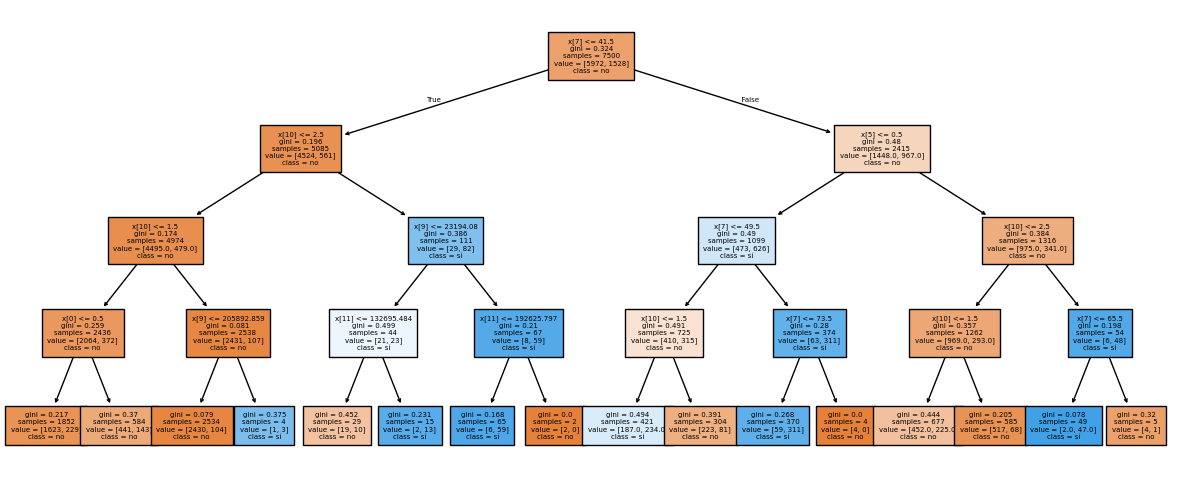

In [147]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

# Selección de modelos

## Ejercicio propuesto

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
X_train



array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 5.3584030e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 6.7840810e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.2171350e+04,
        3.0000000e+00, 1.7810634e+05],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 9.8618790e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 7.2945320e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 1.3801768e+05]])

In [150]:
normalizacion = MinMaxScaler()
x_entrenamiento_normalizado = normalizacion.fit_transform(X_train)

In [151]:
pd.DataFrame(x_entrenamiento_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,1.0,0.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,0.0,0.0,1.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,0.0,0.0,1.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,0.0,1.0,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,0.0,1.0,0.0,1.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,0.0,1.0,0.0,1.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,0.0,0.0,1.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn = KNeighborsClassifier()
knn.fit(x_entrenamiento_normalizado, y_train)

x_test_normalizado = normalizacion.transform(X_test)

knn.score(x_test_normalizado, y_test)

0.8172

In [154]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(x_test_normalizado, y_test)}')

Exactitud Dummy: 0.7964
Exactitud Árbol: 0.8464
Exactitud KNN: 0.8172


In [155]:
import pickle

In [156]:
with open('modelo_onehotenc.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [157]:
with open('modelo_arbol.pkl', 'wb') as archivo:
    pickle.dump(arbol, archivo)

In [158]:
nuevo_dato = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1],
    'salario_estimado': [85270.00]
})

In [159]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_arbol.pkl')

In [160]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)


In [161]:
modelo_arbol.predict(nuevo_dato)[0]

np.int64(0)

# Desafio segundo modelo

In [162]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [163]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prestacar.csv')

In [164]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [165]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(X,y,test_size=0.15, stratify=y,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y, stratify=y,random_state=5)

In [166]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9156794425087108
Precisión de validación: 0.9128124727811167


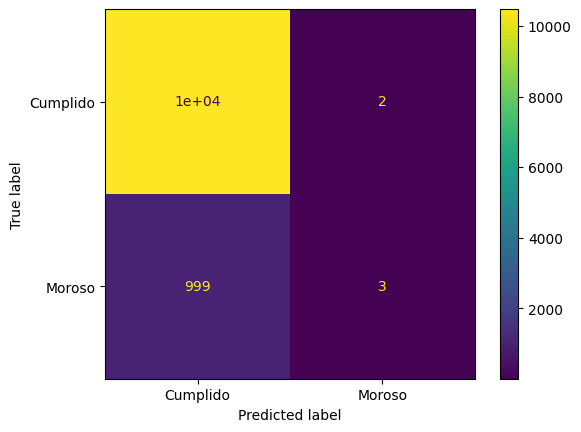

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

#Desafio hora de la práctica

In [168]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [169]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [170]:
X=datos.drop(columns='diabetes',axis=1) #explicativas
y=datos['diabetes']

In [171]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test=train_test_split(X,y,test_size=0.05, stratify=y,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y, stratify=y,random_state=5)

In [172]:
from sklearn.tree import DecisionTreeClassifier
modelo=DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento es:{modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo de validación es:{modelo.score(X_val,y_val)}')

La exactitud del modelo de entrenamiento es:0.7571428571428571
La exactitud del modelo de validación es:0.776595744680851


In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

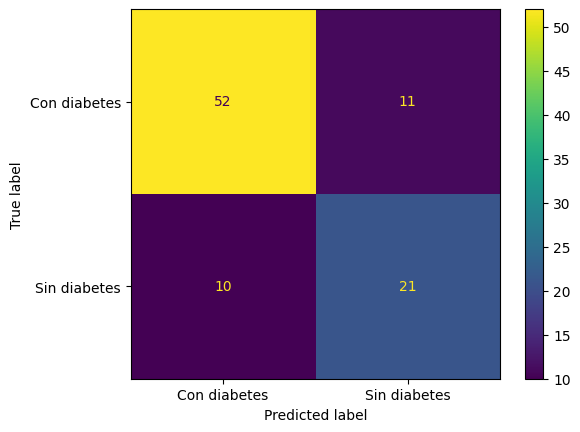

In [174]:
y_previsto=modelo.predict(X_val )
ConfusionMatrixDisplay.from_predictions(y_val, y_previsto, display_labels=['Con diabetes','Sin diabetes']);

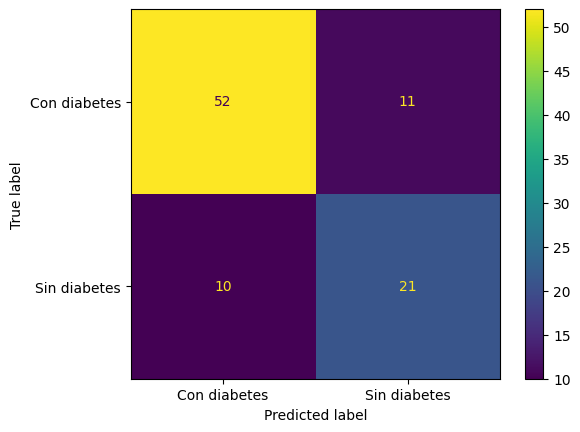

In [175]:
matriz_confusion=confusion_matrix(y_val,y_previsto)
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Con diabetes','Sin diabetes'])
visualizacion.plot();

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo de entrenamiento es:{modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo de validación es:{modelo.score(X_val,y_val)}')

La exactitud del modelo de entrenamiento es:0.7357142857142858
La exactitud del modelo de validación es:0.6914893617021277


In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

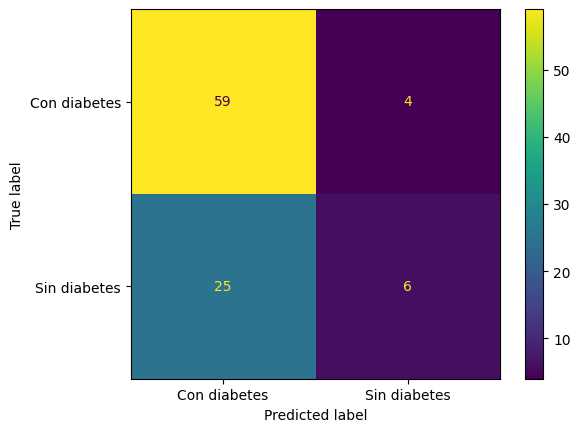

In [179]:
y_previsto=modelo.predict(X_val )
ConfusionMatrixDisplay.from_predictions(y_val, y_previsto, display_labels=['Con diabetes','Sin diabetes']);


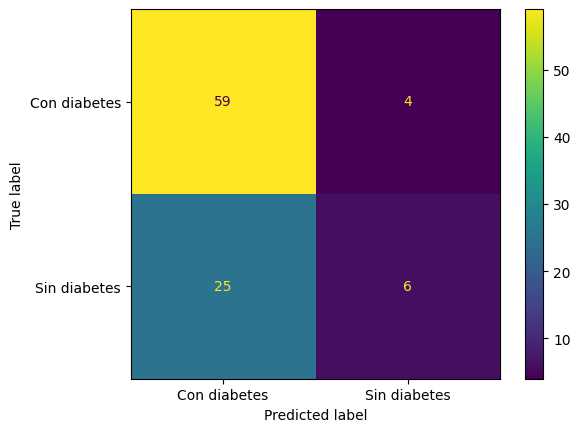

In [180]:
matriz_confusion=confusion_matrix(y_val,y_previsto)
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Con diabetes','Sin diabetes'])
visualizacion.plot();